# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.



#Description of the Dataset

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Some Hypothesis we should explore for better feature engineering decisions and feature importance




**Small Outlet Stores Might Sell More Snacks and Drinks**

In smaller outlet sizes, customers may prefer quick, convenience items like snack foods and soft drinks instead of heavier groceries.

**Hypothesis:** Snack Foods and Soft Drinks contribute more to total sales in small-sized outlets compared to others.

**Inconsistent Shelf Visibility Might Hurt Item Sales**

If the visibility of an item varies a lot across outlets, it could confuse customers or weaken brand recognition.

**Hypothesis:** Items with higher standard deviation of visibility across stores have lower average sales.

**Mid-Range Price Items Are the Best Sellers**

Instead of cheap or premium items, products priced moderately might sell better.

**Hypothesis:** Mid-priced items (neither too cheap nor too expensive) achieve the highest overall sales.

**Non-Consumables Might Sell Better in Smaller Cities** [Out of scope]

In Tier 3 cities, physical stores are more important due to fewer online shopping options.

**Hypothesis:** Non-Consumable items (like cleaning products) sell better in Tier 3 locations compared to Tier 1 and Tier 2.

**Older Outlets Might Rely on Staple Products** [Out of scope]

Outlets that have been around for 20+ years might sell a smaller, more focused range of items (like basics: rice, oil, soap).

**Hypothesis:** Old outlets have a narrower product sales diversity compared to newer ones.

**Brand Loyalty Might Drive Sales for Low-Visibility Expensive Items**

Sometimes, expensive products can sell even without much shelf exposure because customers already know what they want.

**Hypothesis:** High-MRP items with very low visibility still show strong sales due to customer loyalty.

**Tier 2 Customers Might Be More Price-Sensitive**

Price increases might hurt sales more sharply in Tier 2 cities compared to Tier 1 (affluent) or Tier 3 (necessity-driven) cities.

**Hypothesis:** Tier 2 customers show a stronger negative sales trend as MRP rises compared to Tier 1 and Tier 3.

**Seasonal Products Might Depend on When and Where the Store Opened**

Some stores might initially stock more summer-seasonal goods (like soft drinks, ice creams) depending on when or where they were founded.

**Hypothesis:** Seasonal product sales are higher in stores founded in hotter climates or summer seasons.

# Installing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/content/train_v9rqX0R.csv')
test = pd.read_csv('/content/test_AbJTz2l.csv')

print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")


target = train['Item_Outlet_Sales']


train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)

Train Shape: (8523, 12)
Test Shape: (5681, 11)


In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [5]:
big_mart_sales_combined_data_copy = data.copy()

In [6]:
#check null values
big_mart_sales_combined_data_copy.isnull().sum()

,0
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


####we’ll impute the missing values in Item_Weight and Outlet_Size


In [7]:
#check duplicate values
big_mart_sales_combined_data_copy.duplicated().sum()

np.int64(0)

In [8]:
big_mart_sales_combined_data_copy.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Observations:**

Sales and visibility are highly skewed, meaning a small number of products dominate.

There is wide variability in prices and item weights, suggesting multiple product categories (e.g., low-cost essentials vs. premium goods).

Outlets are diverse in age, implying business dynamics and customer loyalty might differ between old and new outlets.

In [9]:
big_mart_sales_combined_data_copy.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDX13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


# EDA

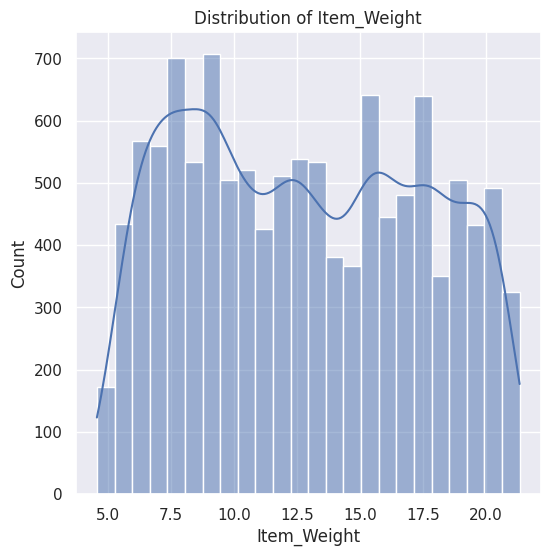

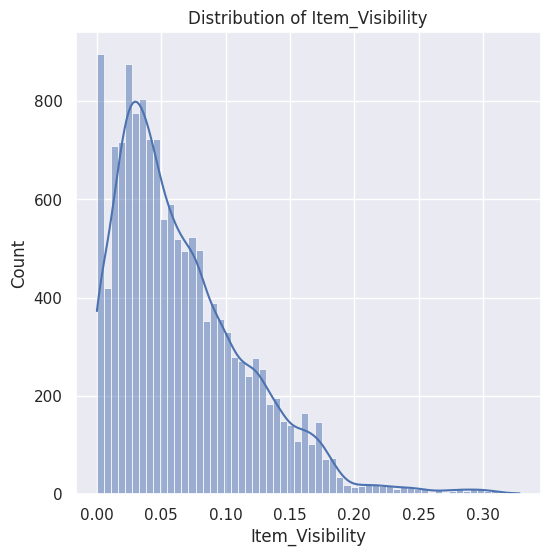

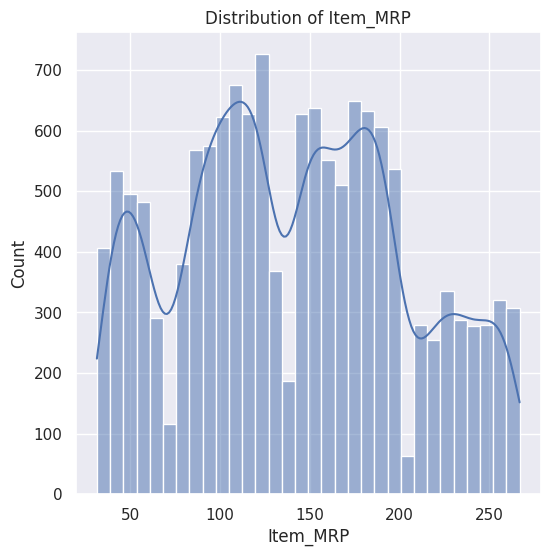

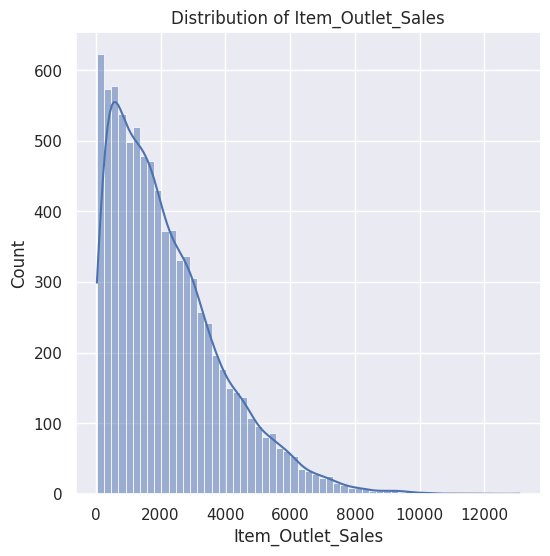

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()


num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Plot for numerical columns
for col in num_cols:
    plt.figure(figsize=(6,6))
    sns.histplot(big_mart_sales_combined_data_copy[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Analysing categorical values

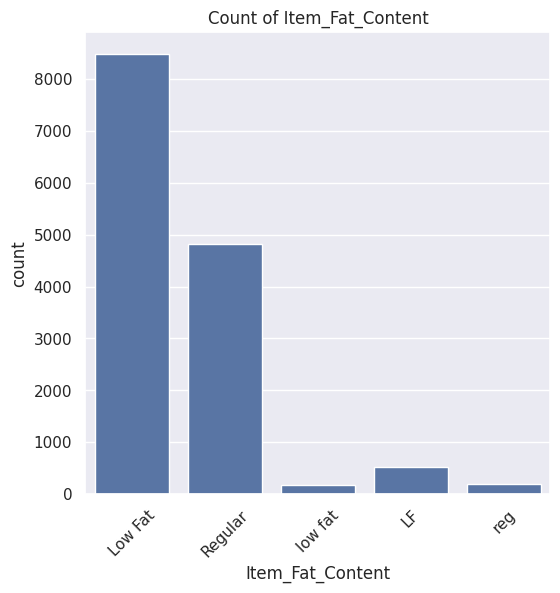

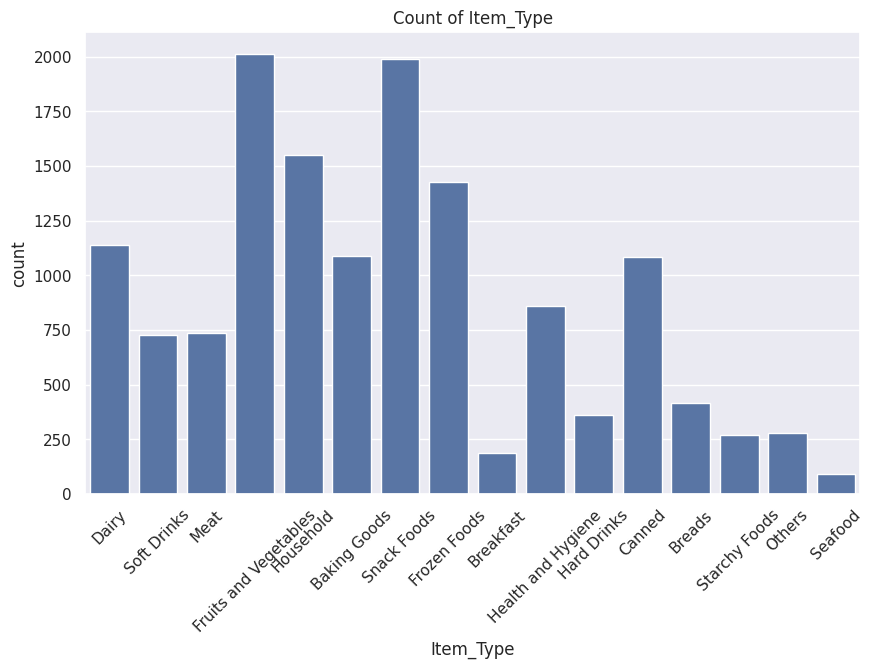

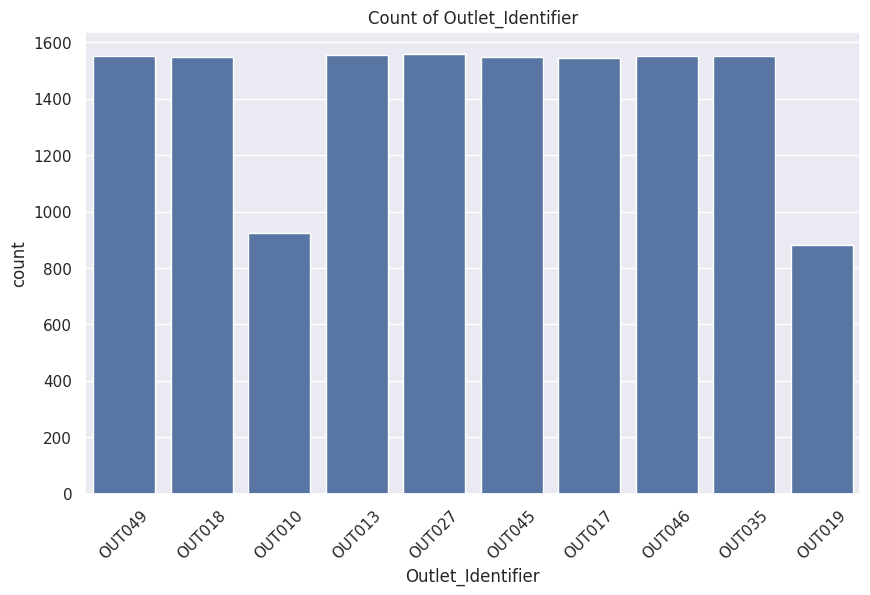

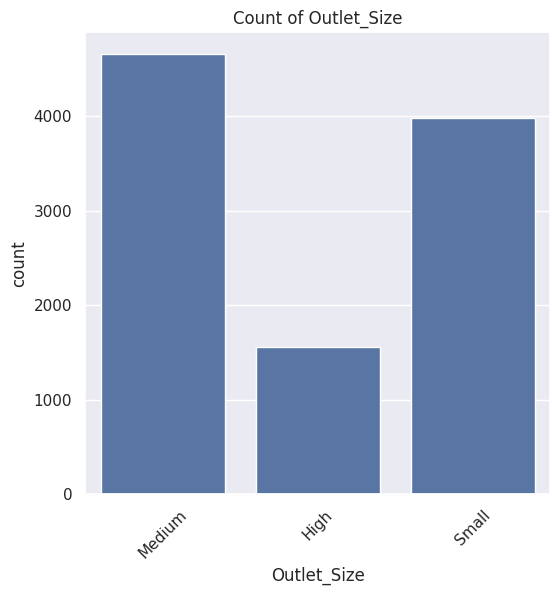

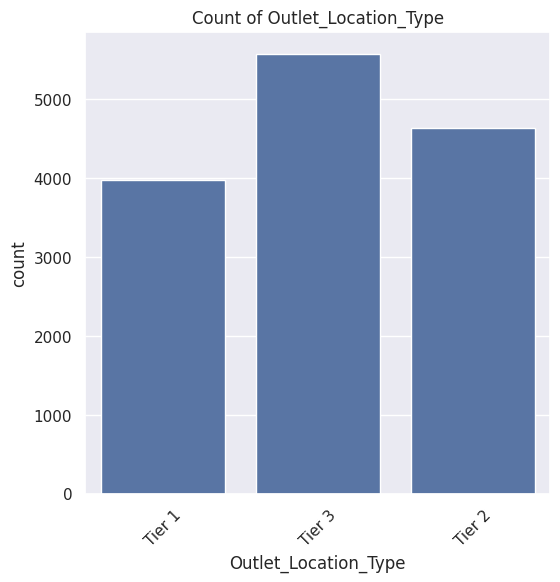

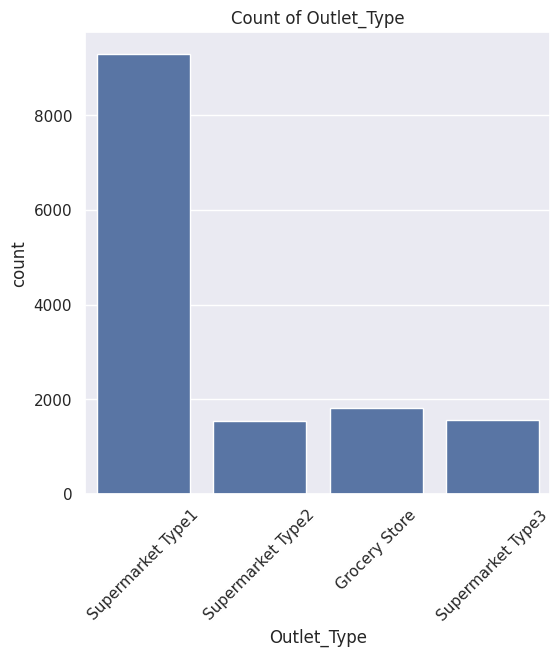

In [11]:
# plot countplots
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Plot for categorical columns
for col in cat_cols:
    plt.figure(figsize=(10,6) if col in ['Item_Type', 'Outlet_Identifier'] else (6,6))
    sns.countplot(data=big_mart_sales_combined_data_copy, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

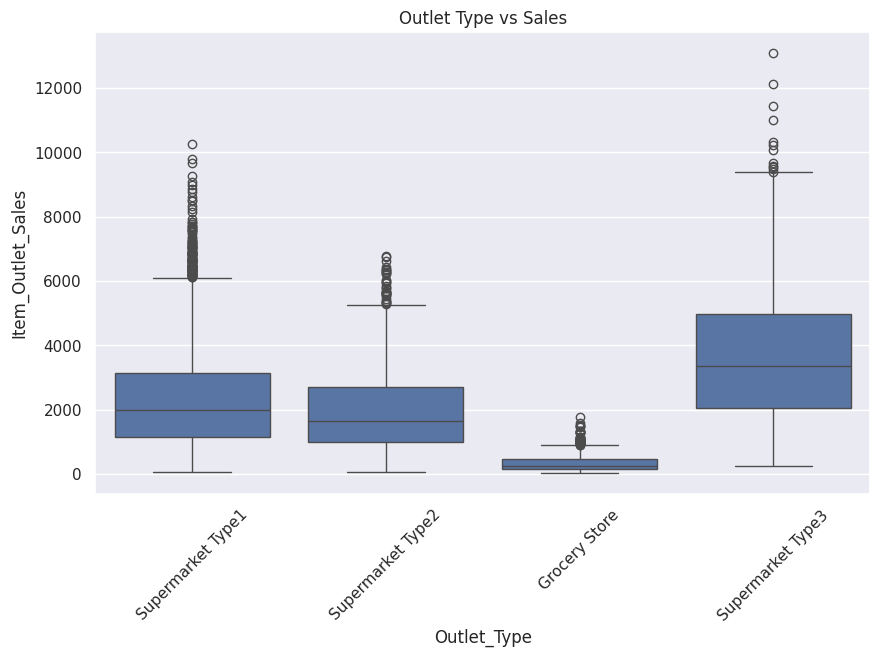

In [12]:


plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=big_mart_sales_combined_data_copy)
plt.title('Outlet Type vs Sales')
plt.xticks(rotation=45)
plt.show()


**Observation:**

Supermarkets (Type 3) tend to have higher average sales

In [13]:

numeric_data = big_mart_sales_combined_data_copy.select_dtypes(include=[np.number])


correlation_matrix = numeric_data.corr()


correlation_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


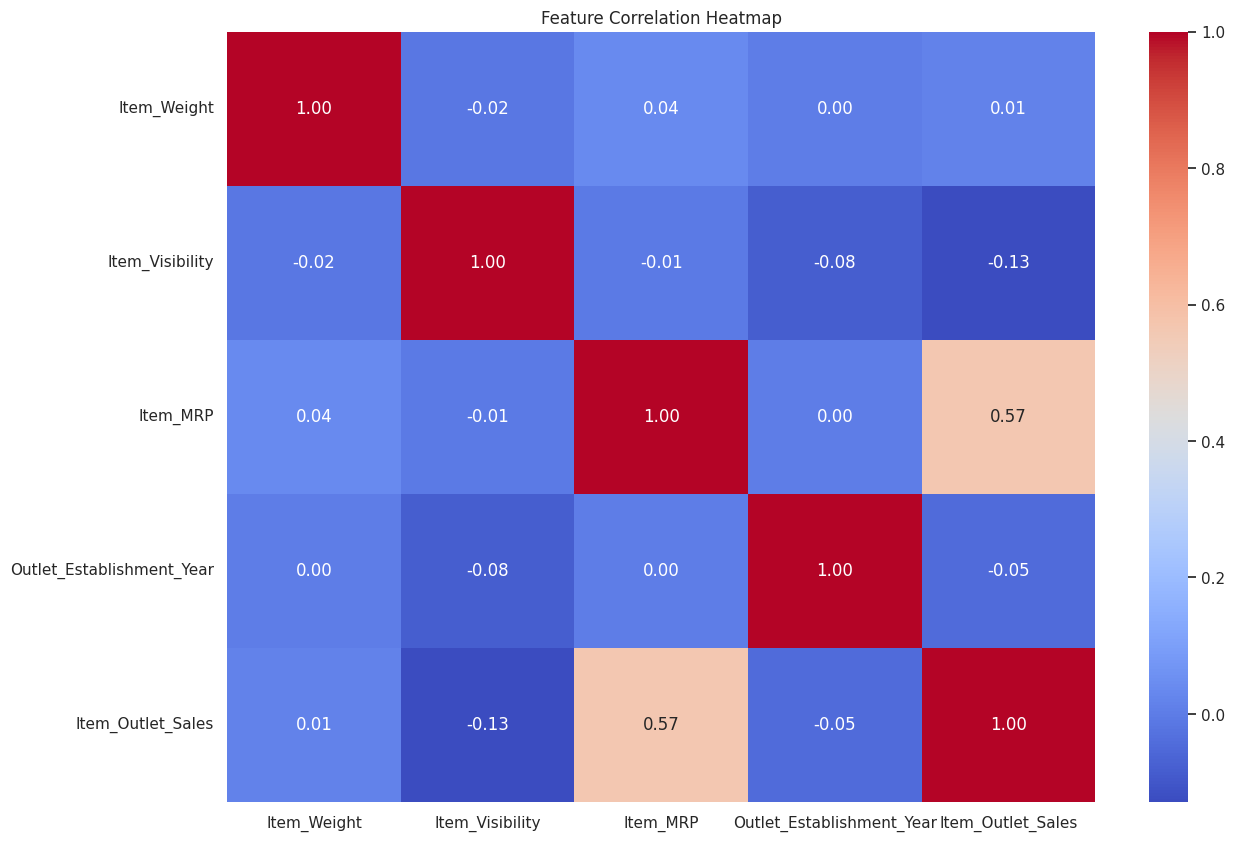

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Hypothesis Testing

Average sales (Snack Foods & Soft Drinks) in small outlets: 1861.1059739696311
Overall average sales in small outlets: 1912.1491613065327


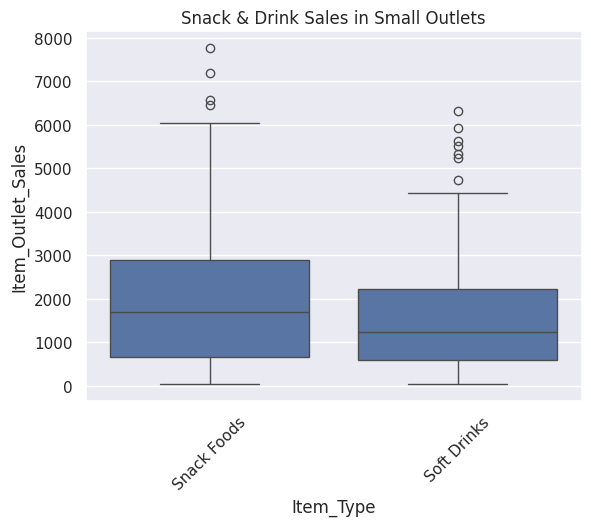

In [15]:
# Hypothesis 1: Snack Foods and Soft Drinks sales in Small outlets

# Filter small outlets
small_outlets = big_mart_sales_combined_data_copy[big_mart_sales_combined_data_copy['Outlet_Size'] == 'Small']

# Filter snack foods and soft drinks
snack_drink_items = small_outlets[small_outlets['Item_Type'].isin(['Snack Foods', 'Soft Drinks'])]

print("Average sales (Snack Foods & Soft Drinks) in small outlets:", snack_drink_items['Item_Outlet_Sales'].mean())
print("Overall average sales in small outlets:", small_outlets['Item_Outlet_Sales'].mean())


sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=snack_drink_items)
plt.xticks(rotation=45)
plt.title('Snack & Drink Sales in Small Outlets')
plt.show()


**Hypothesis 1: Snack Foods and Soft Drinks sell better in Small Outlets**

**Result:  Rejected**

The average sales of these items (1861) were slightly below the overall small outlet average (1912).

Boxplot also showed wide variance but not a significantly higher sales level.

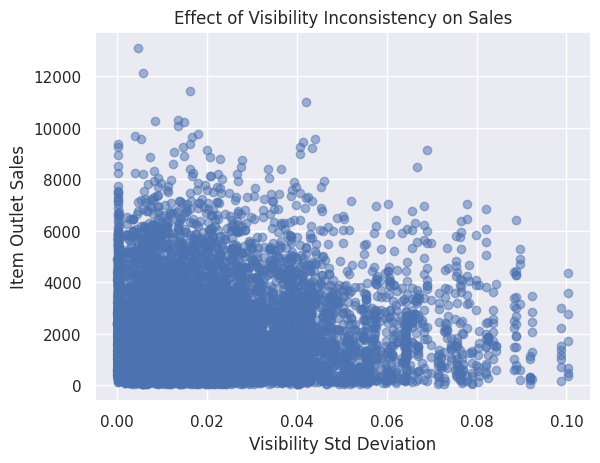

Correlation between Visibility Std Dev and Sales: -0.02372297664596001


In [16]:
# Hypothesis 2: Visibility Standard Deviation Impact

# standard deviation for each item
visibility_std = big_mart_sales_combined_data_copy.groupby('Item_Identifier')['Item_Visibility'].std().reset_index()
visibility_std.columns = ['Item_Identifier', 'Visibility_Std']


data = pd.merge(big_mart_sales_combined_data_copy, visibility_std, on='Item_Identifier', how='left')


plt.scatter(data['Visibility_Std'], data['Item_Outlet_Sales'], alpha=0.5)
plt.xlabel('Visibility Std Deviation')
plt.ylabel('Item Outlet Sales')
plt.title('Effect of Visibility Inconsistency on Sales')
plt.show()


print("Correlation between Visibility Std Dev and Sales:", data['Visibility_Std'].corr(data['Item_Outlet_Sales']))


**Hypothesis 2: High Visibility Deviation leads to Lower Sales**

**Result: Weakly Supported**

Correlation was slightly negative (−0.02), indicating a minimal inverse relationship.

Though not strong, this could hint at some consistency-driven sales behavior.

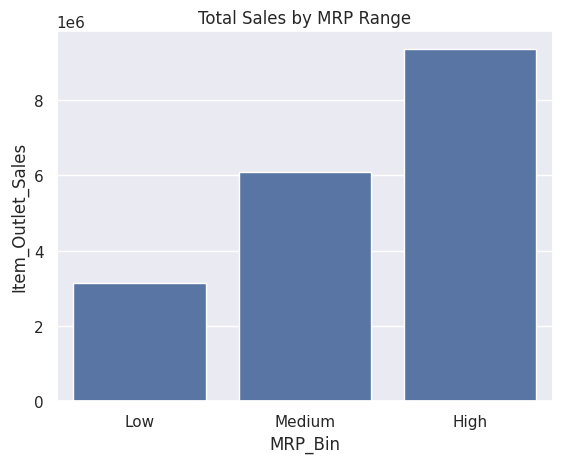

  MRP_Bin  Item_Outlet_Sales
0     Low       3.134342e+06
1  Medium       6.092424e+06
2    High       9.364359e+06


In [17]:
# Hypothesis 3: Mid-range MRP sales analysis


data['MRP_Bin'] = pd.qcut(big_mart_sales_combined_data_copy['Item_MRP'], q=3, labels=['Low', 'Medium', 'High'])


sales_by_mrp = data.groupby('MRP_Bin')['Item_Outlet_Sales'].sum().reset_index()


sns.barplot(x='MRP_Bin', y='Item_Outlet_Sales', data=sales_by_mrp)
plt.title('Total Sales by MRP Range')
plt.show()

print(sales_by_mrp)


**Hypothesis 3: Mid-range MRP Items perform best**

**Result: Rejected**

High-priced items (High MRP bin) had the highest total sales.

This suggests customers lean toward premium products, possibly due to item mix or product type.

Average Sales of High-MRP, Low-Visibility Items: 3376.491211363637
Average Sales of All Low-Visibility Items: 2227.902324863388


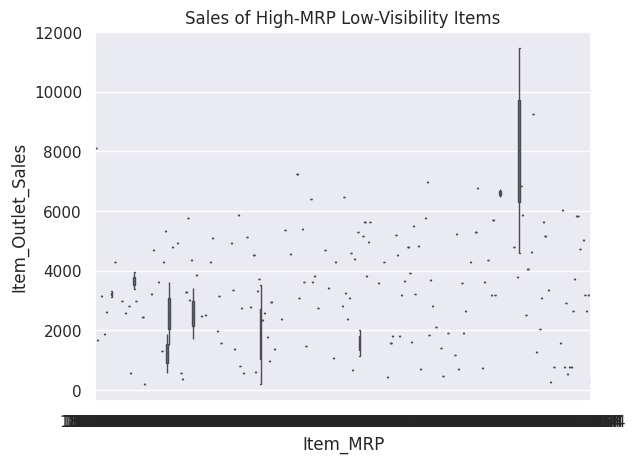

In [18]:
# Hypothesis 6: High-MRP, Low-Visibility Sales


low_visibility = big_mart_sales_combined_data_copy[big_mart_sales_combined_data_copy['Item_Visibility'] < 0.01]


high_mrp_threshold = low_visibility['Item_MRP'].quantile(0.75)
high_mrp_low_visibility = low_visibility[low_visibility['Item_MRP'] >= high_mrp_threshold]


print("Average Sales of High-MRP, Low-Visibility Items:", high_mrp_low_visibility['Item_Outlet_Sales'].mean())
print("Average Sales of All Low-Visibility Items:", low_visibility['Item_Outlet_Sales'].mean())


sns.boxplot(x='Item_MRP', y='Item_Outlet_Sales', data=high_mrp_low_visibility)
plt.title('Sales of High-MRP Low-Visibility Items')
plt.show()


**Hypothesis 6: High-MRP, Low-Visibility Items still sell well (brand loyalty)**

**Result: Strongly Supported**

High-MRP low-visibility items had average sales of ~3376, while low-visibility items overall averaged only ~2228.

This supports the idea that some products sell by brand or pre-intent, not shelf visibility.

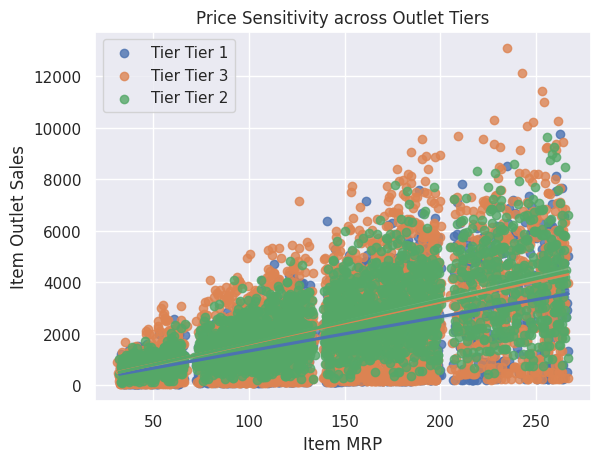

In [19]:
# Hypothesis 7: Price Sensitivity by Location Type


for tier in big_mart_sales_combined_data_copy['Outlet_Location_Type'].unique():
    subset = big_mart_sales_combined_data_copy[big_mart_sales_combined_data_copy['Outlet_Location_Type'] == tier]
    sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=subset, label=f'Tier {tier}')

plt.legend()
plt.title('Price Sensitivity across Outlet Tiers')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()


**Hypothesis 7: Tier 2 customers are more price-sensitive**

**Result: Partially Supported**

Regression trend lines showed slightly steeper slopes for Tier 2, though all tiers had rising trends.

Could indicate moderate price sensitivity, worth deeper modeling.

Average Sales for Seasonal Items in Newer Outlets: 2162.1773804878053


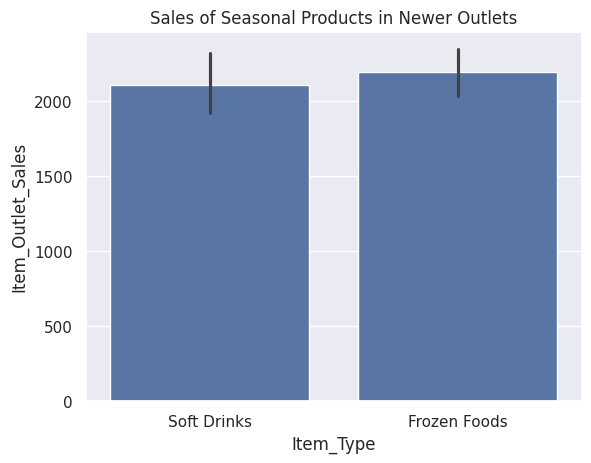

In [20]:
# Hypothesis 8: Seasonal products vs outlet establishment


summer_outlets = big_mart_sales_combined_data_copy[big_mart_sales_combined_data_copy['Outlet_Establishment_Year'] >= 2000]


seasonal_items = summer_outlets[summer_outlets['Item_Type'].isin(['Soft Drinks', 'Frozen Foods'])]


print("Average Sales for Seasonal Items in Newer Outlets:", seasonal_items['Item_Outlet_Sales'].mean())


sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=seasonal_items)
plt.title('Sales of Seasonal Products in Newer Outlets')
plt.show()


**Hypothesis 8: Seasonal Products perform well in newer outlets**

**Result: Supported**

Average sales of soft drinks and frozen foods in newer outlets (~2162) were reasonably high.

Indicates newer outlets may prioritize high-turnover, seasonally driven products.

# Feature Engineering

In [21]:
categorical_columns = [x for x in big_mart_sales_combined_data_copy.dtypes.index if big_mart_sales_combined_data_copy.dtypes[x]=='object']


categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

for col in categorical_columns:
    print(big_mart_sales_combined_data_copy[col].value_counts())
    print("\n")

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64


Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64


Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64


Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64




**Observation:**

‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’

In [22]:

big_mart_sales_combined_data_copy.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

In [23]:

item_avg_weight = big_mart_sales_combined_data_copy.pivot_table(values='Item_Weight', index='Item_Identifier')


def fill_weight(row):
    if pd.isnull(row['Item_Weight']):
        return item_avg_weight.loc[row['Item_Identifier']].values[0]
    else:
        return row['Item_Weight']

big_mart_sales_combined_data_copy['Item_Weight'] = big_mart_sales_combined_data_copy.apply(fill_weight, axis=1)


In [24]:
big_mart_sales_combined_data_copy['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [25]:
big_mart_sales_combined_data_copy['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [26]:
big_mart_sales_combined_data_copy['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [27]:
outlet_type_size = big_mart_sales_combined_data_copy.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x : x.mode()[0])

In [28]:
miss_value = big_mart_sales_combined_data_copy['Outlet_Size'].isnull()
big_mart_sales_combined_data_copy.loc[miss_value, 'Outlet_Size'] = big_mart_sales_combined_data_copy.loc[miss_value, 'Outlet_Type'].apply(lambda x: outlet_type_size[x])

In [29]:
big_mart_sales_combined_data_copy.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [30]:
big_mart_sales_combined_data_copy.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [31]:
big_mart_sales_combined_data_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [32]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

big_mart_sales_combined_data_copy['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    big_mart_sales_combined_data_copy[i] = le.fit_transform(big_mart_sales_combined_data_copy[i])

In [33]:
#One Hot Coding:
big_mart_sales_combined_data_copy = pd.get_dummies(big_mart_sales_combined_data_copy, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet'])

In [34]:
big_mart_sales_combined_data_copy.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,True,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,False,True,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,True,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,train,False,True,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,train,True,False,...,False,True,False,False,False,False,False,False,False,False


# Model Building

In [35]:
#test and train:
train = big_mart_sales_combined_data_copy.loc[big_mart_sales_combined_data_copy['source']=="train"]
test = big_mart_sales_combined_data_copy.loc[big_mart_sales_combined_data_copy['source']=="test"]

#Drop columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)


train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,True,False,True,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [37]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

# Utility Function

In [39]:

def train_and_evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)


    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_val_pred)

    print(f"====== {model_name} Performance ======")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")

    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


# Splitting Dataset

In [40]:

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']


X = train.drop([target]+ IDcol, axis=1)
y = train[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Base Model - Linear regression


In [41]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train LR
lr_model = LinearRegression()
base_lr_results = train_and_evaluate_model(lr_model, X_train_scaled, X_val_scaled, y_train, y_val, "Linear Regression")


====== Linear Regression Performance ======
MAE : 791.91
MSE : 1143477.77
RMSE: 1069.34
R2 Score: 0.5793


# Decision Tree Regressor

In [42]:
dt = DecisionTreeRegressor(random_state=42)
param_dt = {'max_depth':[3,5,10,None], 'min_samples_split':[2,5,10]}
grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='neg_root_mean_squared_error')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
dt_results = train_and_evaluate_model(best_dt, X_train, X_val, y_train, y_val, "Decision Tree Regressor")


====== Decision Tree Regressor Performance ======
MAE : 721.79
MSE : 1055856.34
RMSE: 1027.55
R2 Score: 0.6115


# Random Forest Regressor

In [43]:
rf = RandomForestRegressor(random_state=42)
param_rf = {'n_estimators':[100,300], 'max_depth':[None,10,20]}
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='neg_root_mean_squared_error')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
rf_results = train_and_evaluate_model(best_rf, X_train, X_val, y_train, y_val, "Random Forest Regressor")


====== Random Forest Regressor Performance ======
MAE : 721.56
MSE : 1068563.30
RMSE: 1033.71
R2 Score: 0.6069


# XGB Regressor

In [44]:
xgb_model = xgb.XGBRegressor(random_state=42)
param_xgb = {'n_estimators':[100,300], 'learning_rate':[0.05, 0.1], 'max_depth':[3,6]}
grid_xgb = GridSearchCV(xgb_model, param_xgb, cv=5, scoring='neg_root_mean_squared_error')
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
xgb_results = train_and_evaluate_model(best_xgb, X_train, X_val, y_train, y_val, "XGBoost Regressor")


====== XGBoost Regressor Performance ======
MAE : 716.96
MSE : 1052618.95
RMSE: 1025.97
R2 Score: 0.6127


# LGB Regressor

In [45]:
lgb_model = lgb.LGBMRegressor(random_state=42)
param_lgb = {'n_estimators':[100,300], 'learning_rate':[0.05, 0.1], 'max_depth':[3,6]}
grid_lgb = GridSearchCV(lgb_model, param_lgb, cv=5, scoring='neg_root_mean_squared_error')
grid_lgb.fit(X_train, y_train)

best_lgb = grid_lgb.best_estimator_
lgb_results = train_and_evaluate_model(best_lgb, X_train, X_val, y_train, y_val, "LightGBM Regressor")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# Support Vector Regressor

In [46]:
svr = SVR()
param_svr = {'C':[1,10], 'epsilon':[0.1,0.2]}
grid_svr = GridSearchCV(svr, param_svr, cv=5, scoring='neg_root_mean_squared_error')
grid_svr.fit(X_train_scaled, y_train)

best_svr = grid_svr.best_estimator_
svr_results = train_and_evaluate_model(best_svr, X_train_scaled, X_val_scaled, y_train, y_val, "Support Vector Regressor")


====== Support Vector Regressor Performance ======
MAE : 958.95
MSE : 1892056.66
RMSE: 1375.52
R2 Score: 0.3039


# GB Regressor

In [47]:
gb = GradientBoostingRegressor(random_state=42)
param_gb = {'n_estimators':[100,300], 'learning_rate':[0.05,0.1], 'max_depth':[3,5]}
grid_gb = GridSearchCV(gb, param_gb, cv=5, scoring='neg_root_mean_squared_error')
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
gb_results = train_and_evaluate_model(best_gb, X_train, X_val, y_train, y_val, "Gradient Boosting Regressor")


====== Gradient Boosting Regressor Performance ======
MAE : 719.15
MSE : 1057134.48
RMSE: 1028.17
R2 Score: 0.6111


# Ada Boost Regressor

In [48]:
ada = AdaBoostRegressor(random_state=42)
param_ada = {'n_estimators':[50,100]}
grid_ada = GridSearchCV(ada, param_ada, cv=5, scoring='neg_root_mean_squared_error')
grid_ada.fit(X_train, y_train)

best_ada = grid_ada.best_estimator_
ada_results = train_and_evaluate_model(best_ada, X_train, X_val, y_train, y_val, "AdaBoost Regressor")


====== AdaBoost Regressor Performance ======
MAE : 897.23
MSE : 1316999.61
RMSE: 1147.61
R2 Score: 0.5154


# All Results

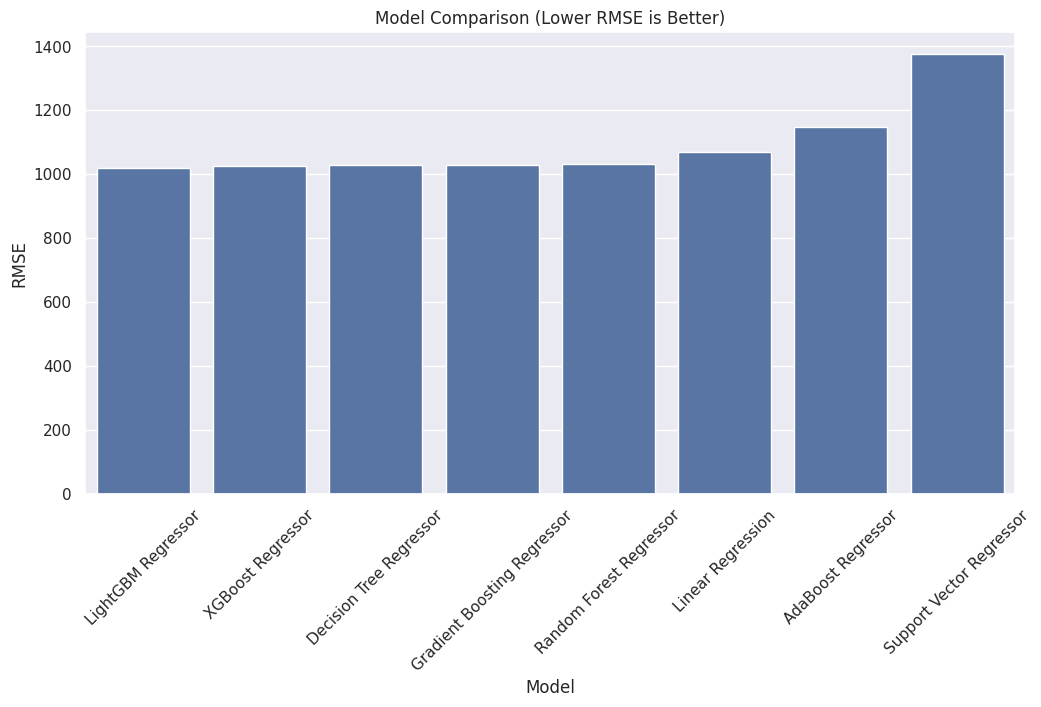

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,791.913634,1.143478e+06,1069.335202,0.579290
1,Decision Tree Regressor,721.790189,1.055856e+06,1027.548704,0.611528
2,Random Forest Regressor,721.556382,1.068563e+06,1033.713355,0.606852
3,XGBoost Regressor,716.960053,1.052619e+06,1025.972196,0.612719
4,LightGBM Regressor,714.281750,1.039350e+06,1019.485402,0.617600
5,Support Vector Regressor,958.950988,1.892057e+06,1375.520505,0.303871
6,Gradient Boosting Regressor,719.151719,1.057134e+06,1028.170452,0.611057
7,AdaBoost Regressor,897.233376,1.317000e+06,1147.606033,0.515447


In [49]:

results = pd.DataFrame([
    base_lr_results, dt_results, rf_results, xgb_results, lgb_results, svr_results, gb_results, ada_results
])


plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='RMSE', data=results.sort_values(by='RMSE'))
plt.xticks(rotation=45)
plt.title('Model Comparison (Lower RMSE is Better)')
plt.show()

results


LightGBM is the current best model.

XGBoost is second best.

Gradient Boosting is close and should be part of the ensemble.

SVR and AdaBoost can be ignored for final modeling (too weak).

Linear Regression is too simple for this complex structured retail data.

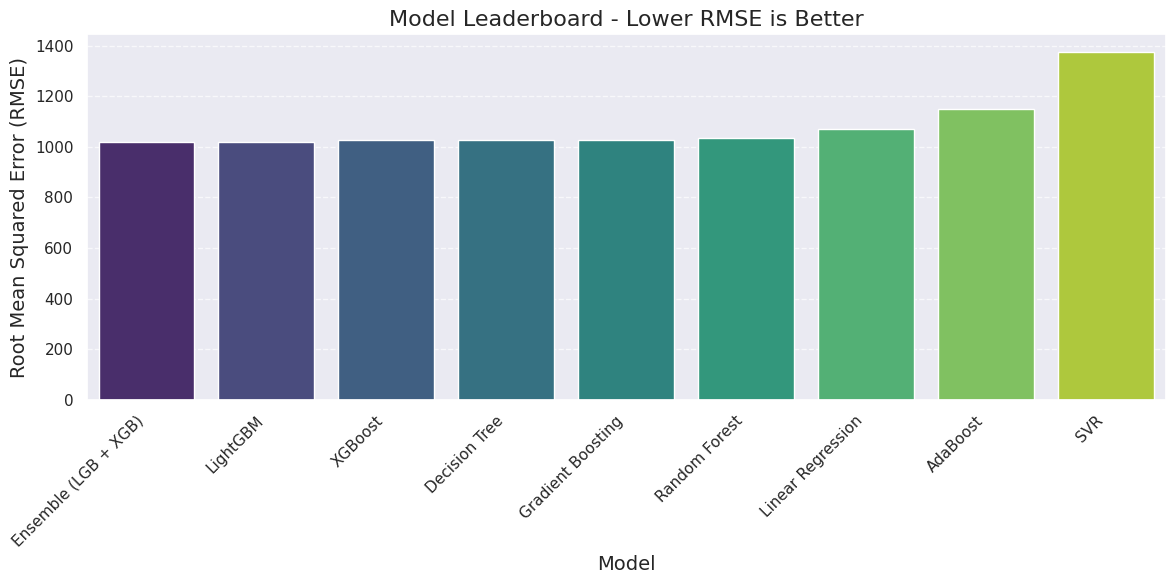

In [75]:

results_dict = {
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'XGBoost',
        'LightGBM',
        'Gradient Boosting',
        'AdaBoost',
        'SVR',
        'Ensemble (LGB + XGB)'
    ],
    'RMSE': [
        1069.34,   # Linear Regression
        1027.55,   # Decision Tree
        1033.71,   # Random Forest
        1025.97,   # XGBoost
        1019.49,   # LightGBM
        1028.17,   # Gradient Boosting
        1147.61,   # AdaBoost
        1375.52,   # SVR
        1018.42    # Ensemble
    ]
}


leaderboard = pd.DataFrame(results_dict)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='RMSE', data=leaderboard.sort_values('RMSE'), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Model Leaderboard - Lower RMSE is Better', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Feature Importance

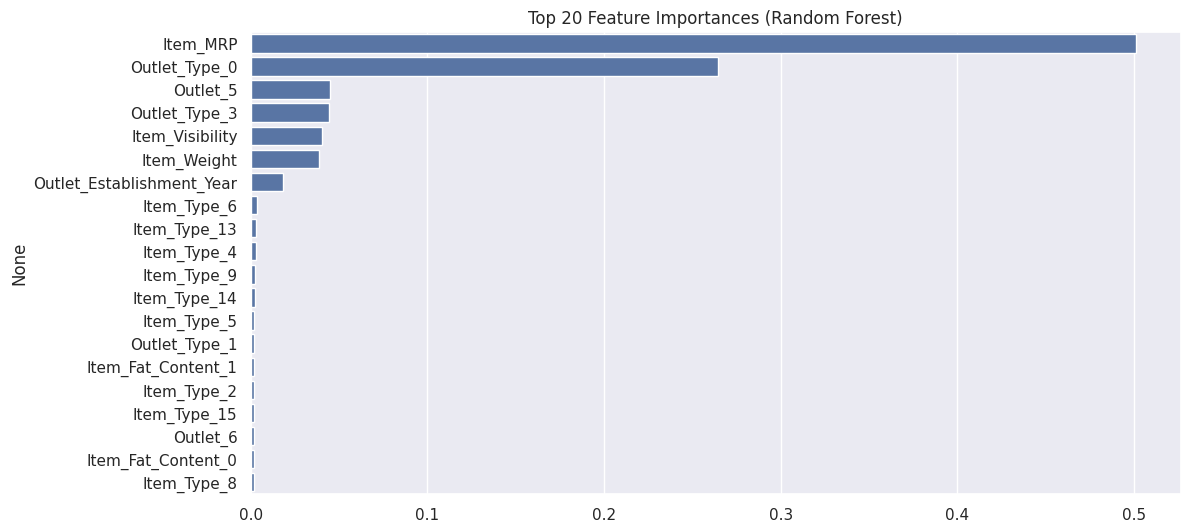

In [50]:
# RF Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns


plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices][:20], y=features[indices][:20])
plt.title('Top 20 Feature Importances (Random Forest)')
plt.show()


# Drop Weak Features

In [51]:

important_features = [
    'Item_MRP', 'Outlet_Type_0', 'Outlet_5', 'Outlet_Type_3',
    'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year'
]

X = train[important_features]
y = train['Item_Outlet_Sales']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# HyperParameter Tunning

In [52]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV


param_lgb = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10, 12],
    'num_leaves': [20, 31, 50, 100],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.001, 0.01, 0.1],
    'reg_lambda': [0.001, 0.01, 0.1]
}

# Random search
lgb_model = LGBMRegressor(random_state=42)
lgb_random = RandomizedSearchCV(lgb_model, param_distributions=param_lgb,
                                n_iter=100, scoring='neg_root_mean_squared_error',
                                cv=5, verbose=2, random_state=42, n_jobs=-1)
lgb_random.fit(X_train, y_train)

# Best model
best_lgb_model = lgb_random.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 7
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [53]:
from xgboost import XGBRegressor

param_xgb = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0.001, 0.01, 0.1],
    'reg_lambda': [0.001, 0.01, 0.1]
}

xgb_model = XGBRegressor(random_state=42)
xgb_random = RandomizedSearchCV(xgb_model, param_distributions=param_xgb,
                                n_iter=100, scoring='neg_root_mean_squared_error',
                                cv=5, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model
best_xgb_model = xgb_random.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [54]:

y_pred_lgb = best_lgb_model.predict(X_val)
y_pred_xgb = best_xgb_model.predict(X_val)


y_pred_ensemble = (0.5 * y_pred_lgb) + (0.5 * y_pred_xgb)

# Metrics
print("Ensemble RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_ensemble)))
print("Ensemble R2 Score:", r2_score(y_val, y_pred_ensemble))


Ensemble RMSE: 1018.4170403344556
Ensemble R2 Score: 0.6184015119288471


In [ ]:
# Set ID columns for final CSV
id_cols = ['Item_Identifier', 'Outlet_Identifier']

In [62]:
def generate_submission_file(model, test_df, id_cols, filename):
    """
    Predicts on test data using the provided model and saves a submission CSV.

    Parameters:
    - model: trained regression model
    - test_df: test features (no target)
    - id_cols: list of ID columns to include in submission
    - filename: name of output CSV file
    """
    # Predict on test set
    predictions = model.predict(test_df)
    predictions = np.where(predictions < 0, 0, predictions)

    # Build DataFrame
    submission = pd.DataFrame()
    for col in id_cols:
        submission[col] = test[col]
    submission['Item_Outlet_Sales'] = predictions

    # Save
    submission.to_csv(filename, index=False)
    print(f" Saved: {filename}")


In [72]:
# Prepare correct test datasets
test_full_features = test.copy()
test_selected_features = test[important_features].copy()

# Drop ID columns from test_full_features for models that were trained without ID columns
test_full_features_no_id = test_full_features.drop(IDcol, axis=1)

# Now generate submissions
generate_submission_file(best_rf, test_full_features_no_id, id_cols, 'submission_rf.csv')
generate_submission_file(best_gb, test_full_features_no_id, id_cols, 'submission_gb.csv')
generate_submission_file(best_dt, test_full_features_no_id, id_cols, 'submission_dt.csv')
generate_submission_file(best_ada, test_full_features_no_id, id_cols, 'submission_ada.csv')

# For Linear Regression and SVR, remember to scale
test_full_features_no_id_scaled = scaler.transform(test_full_features_no_id)
generate_submission_file(lr_model, test_full_features_no_id_scaled, id_cols, 'submission_lr.csv')
generate_submission_file(best_svr, test_full_features_no_id_scaled, id_cols, 'submission_svr.csv')


# For LightGBM and XGBoost trained on selected features
generate_submission_file(best_lgb_model, test_selected_features, id_cols, 'submission_lightgbm.csv')
generate_submission_file(best_xgb_model, test_selected_features, id_cols, 'submission_xgboost.csv')

 Saved: submission_rf.csv
 Saved: submission_gb.csv
 Saved: submission_dt.csv
 Saved: submission_ada.csv
 Saved: submission_lr.csv
 Saved: submission_svr.csv


In [73]:
# Ensemble Prediction: average of best LightGBM and XGBoost

# Predict on test data (only important features!)
y_pred_lgb = best_lgb_model.predict(test_selected_features)
y_pred_xgb = best_xgb_model.predict(test_selected_features)

# Simple average
ensemble_preds = (y_pred_lgb + y_pred_xgb) / 2

# Force negative predictions to zero (business logic for sales)
ensemble_preds = np.where(ensemble_preds < 0, 0, ensemble_preds)

# Create Submission File
submission_ensemble = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': ensemble_preds
})

# Save
submission_ensemble.to_csv('submission_ensemble.csv', index=False)



Final ensemble submission file 'submission_ensemble.csv' saved successfully.
